In [97]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [98]:
df = pd.read_csv("/kaggle/input/brca-data/BRCA Data.csv")
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [99]:
# null values
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [100]:
df.isnull()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
337,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
338,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
339,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [101]:
df.shape

(341, 16)

In [102]:
# drop null values
df.dropna(inplace=True)

In [103]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [104]:
df.shape

(317, 16)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [106]:
df.Gender.value_counts() #Highly imbalanced column

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

In [107]:
print('Patient Status in 100%')
round(df.Patient_Status.value_counts()*100/len(df),1)

Patient Status in 100%


Patient_Status
Alive    80.4
Dead     19.6
Name: count, dtype: float64

# Visulization

In [108]:
Patient_Status = df['Patient_Status'].value_counts()
transactions = Patient_Status.index
quantity = Patient_Status.values

figure = px.pie(df, 
             values=quantity, 
             names=transactions, hole =.60, 
             title="Patient Status")
figure.show()

In [109]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [110]:
stage = df["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values

figure = px.pie(df, 
             values=quantity, 
             names=transactions, hole = 0.5, 
             title="Tumour Stages of Patients")
figure.show()

In [111]:
histology = df["Histology"].value_counts()
transactions = histology.index
quantity = histology.values

figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Histology of Patients")
figure.show()

In [112]:
ER_status = df['ER status'].value_counts()
transactions = ER_status.index
quantity = ER_status.values

figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="ER Status")
figure.show()

In [113]:
PR_status = df['PR status'].value_counts()
transactions = PR_status.index
quantity = PR_status.values

figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Patient Status")
figure.show()

In [114]:
HER2_status = df['HER2 status'].value_counts()
transactions = HER2_status.index
quantity = HER2_status.values

figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="HER2 status")
figure.show()

In [115]:
df.drop(['Patient_ID','ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],axis=1,inplace=True)

In [116]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [117]:
df.Gender.value_counts()

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

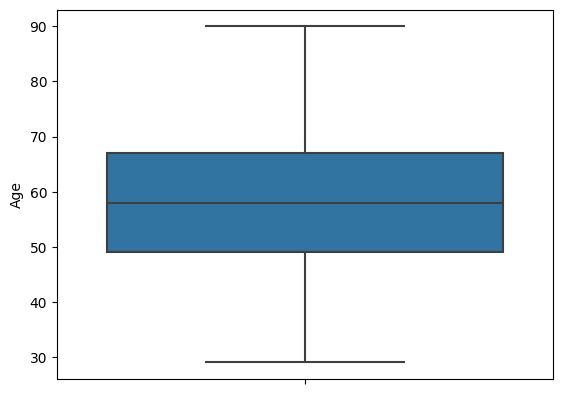

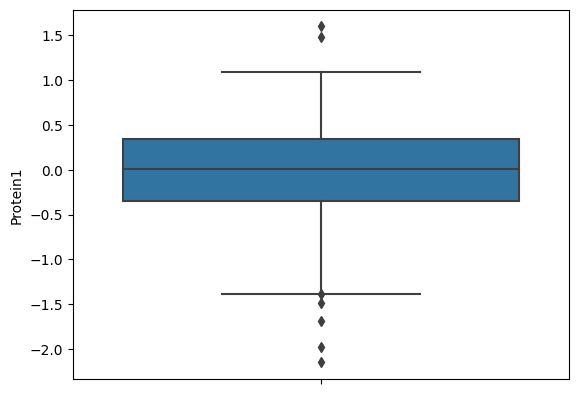

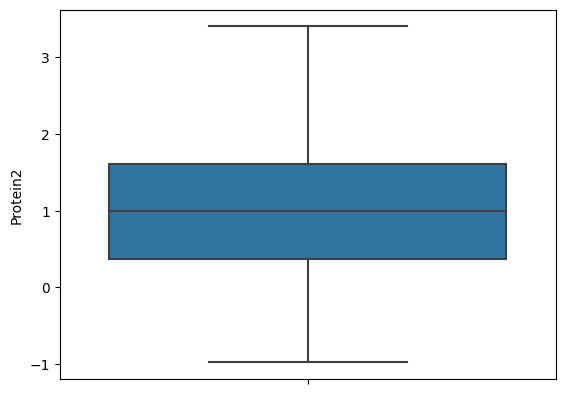

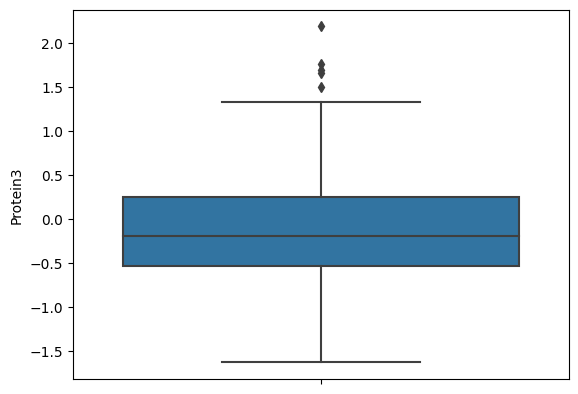

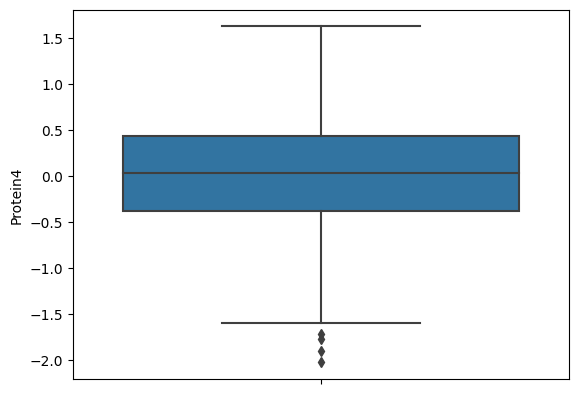

In [118]:
for i in ['Age','Protein1','Protein2','Protein3','Protein4']:
    plt.figsize=(10,5)
    sns.boxplot(y = df[i])
    plt.show()

In [119]:
!#pip show ydata-profiling


In [120]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="EDA Report of Breast Cancer Dataset")
profile.to_notebook_iframe()  


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 181.36it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [121]:
# 5. Encoding Categorical Columns
le = LabelEncoder()
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
print("\n🔹 Encoded Columns:", cat_cols.tolist())


🔹 Encoded Columns: ['Gender', 'Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type', 'Patient_Status']


In [122]:
df.describe()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,0.012618,-0.027232,0.949557,-0.095104,0.006713,1.053628,0.331230,0.091483,1.507886,0.195584
std,12.827374,0.111797,0.543858,0.906153,0.589027,0.625965,0.656246,0.546047,0.288750,1.039155,0.397276
min,29.000000,0.000000,-2.144600,-0.978730,-1.627400,-2.025500,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,-0.350600,0.368840,-0.531360,-0.382240,1.000000,0.000000,0.000000,1.000000,0.000000
50%,58.000000,0.000000,0.005649,0.997130,-0.193040,0.038522,1.000000,0.000000,0.000000,2.000000,0.000000
75%,67.000000,0.000000,0.336260,1.612000,0.251210,0.436250,1.000000,1.000000,0.000000,2.000000,0.000000
max,90.000000,1.000000,1.593600,3.402200,2.193400,1.629900,2.000000,2.000000,1.000000,3.000000,1.000000


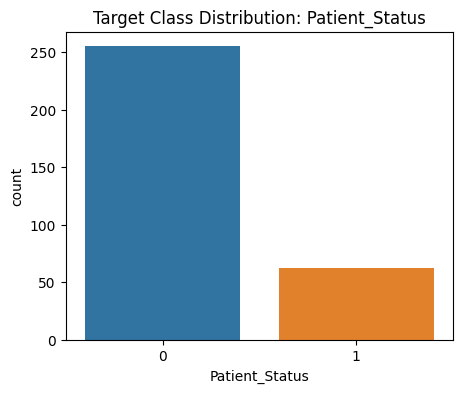

In [123]:
#Class distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Patient_Status', data=df)
plt.title("Target Class Distribution: Patient_Status")
plt.show()

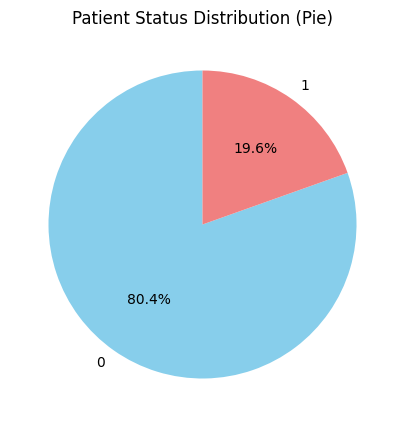

In [124]:
#Pie chart
label_counts = df['Patient_Status'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Patient Status Distribution (Pie)")
plt.show()

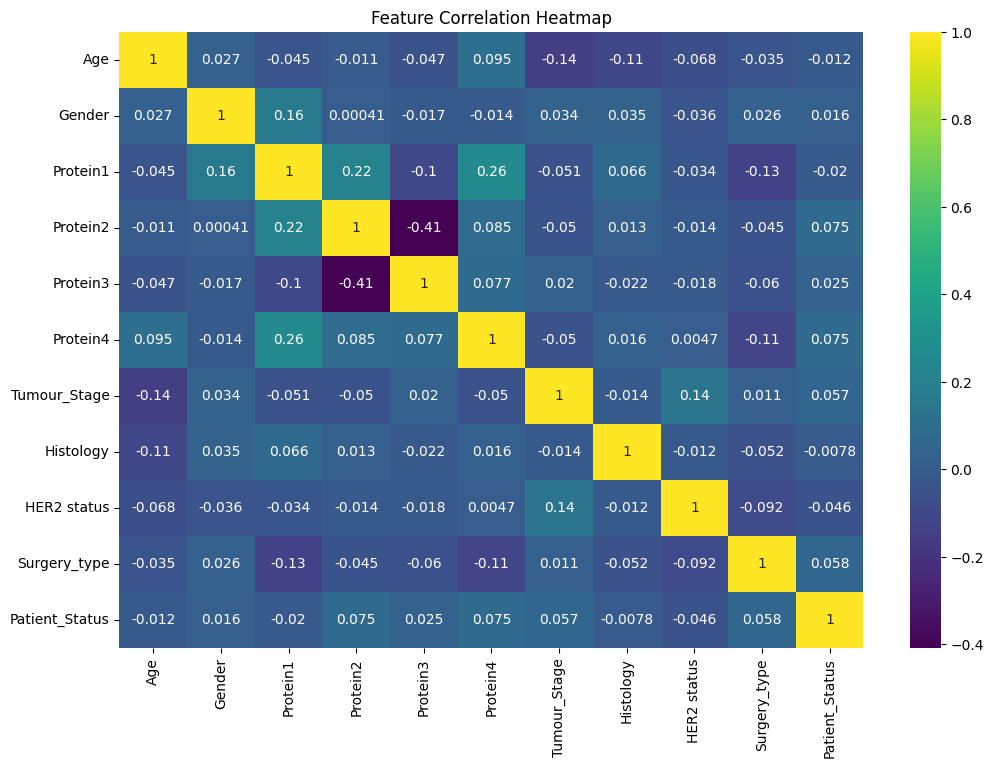

In [125]:
#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()

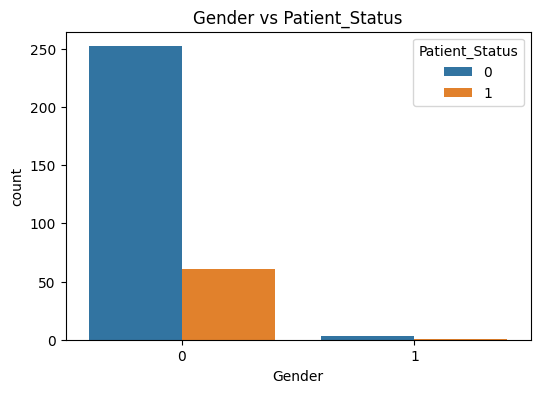

In [126]:
# Gender vs Patient_Status countplot (if Gender exists)
if 'Gender' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Gender', hue='Patient_Status', data=df)
    plt.title("Gender vs Patient_Status")
    plt.show()


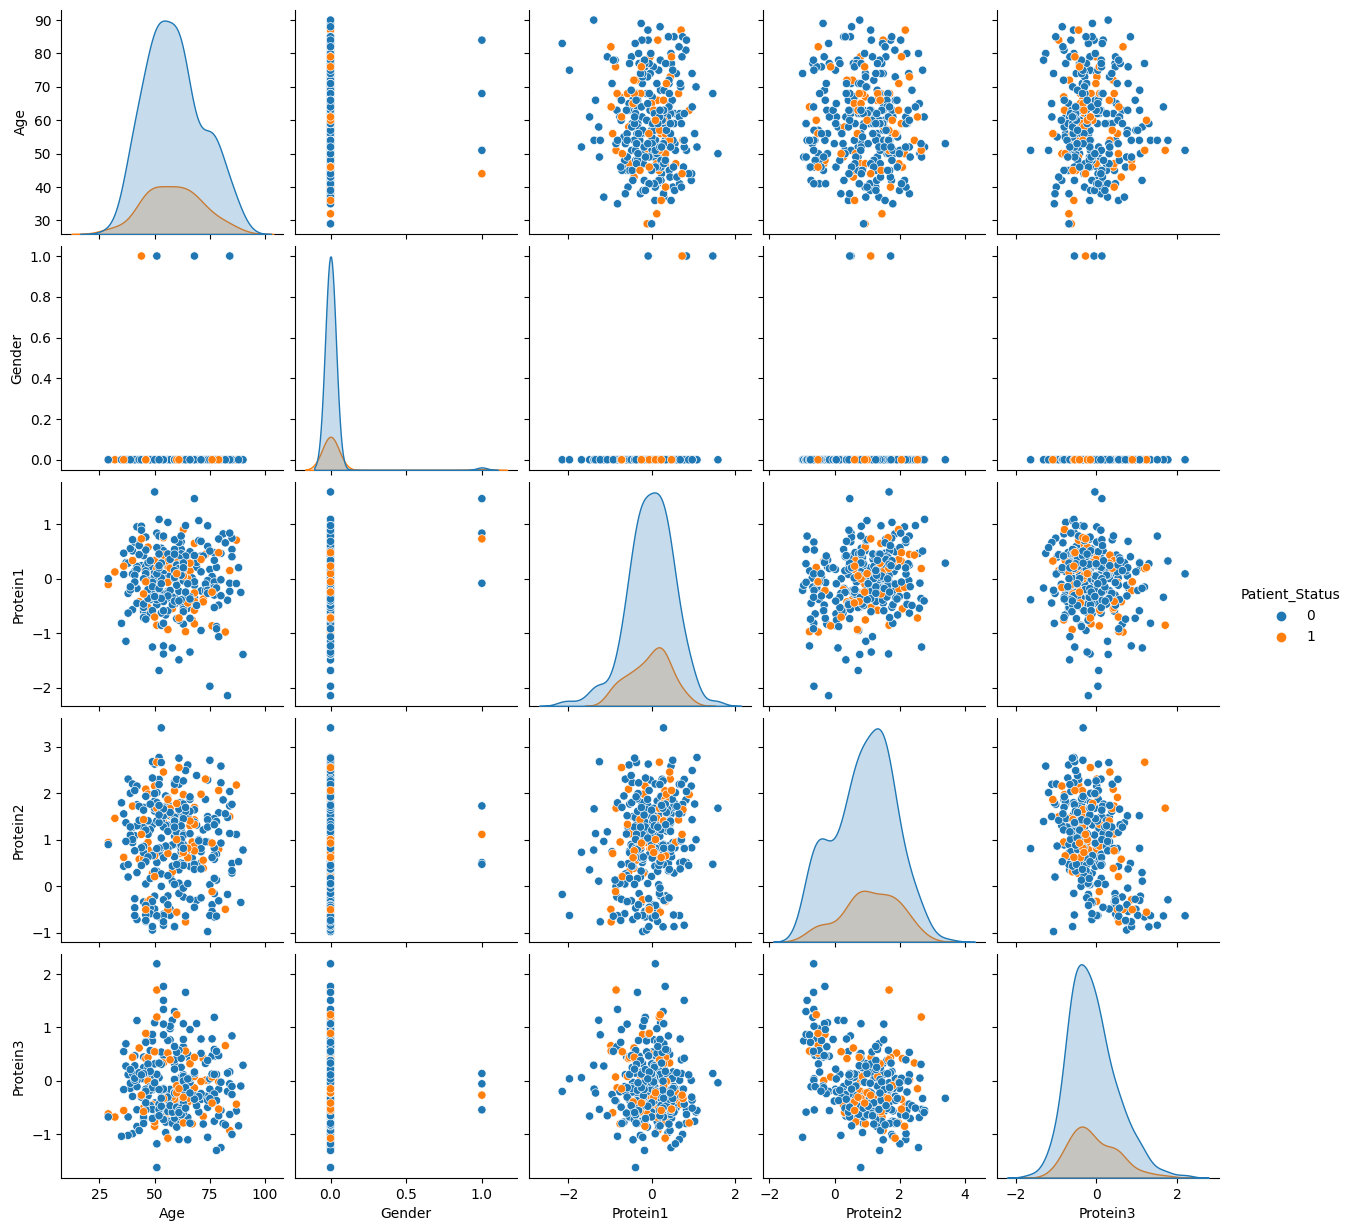

In [127]:
# Pairplot (only for numerical subset)
sample_cols = df.select_dtypes(include=['int64', 'float64']).columns[:5].tolist()
sns.pairplot(df[sample_cols + ['Patient_Status']], hue='Patient_Status')
plt.show()

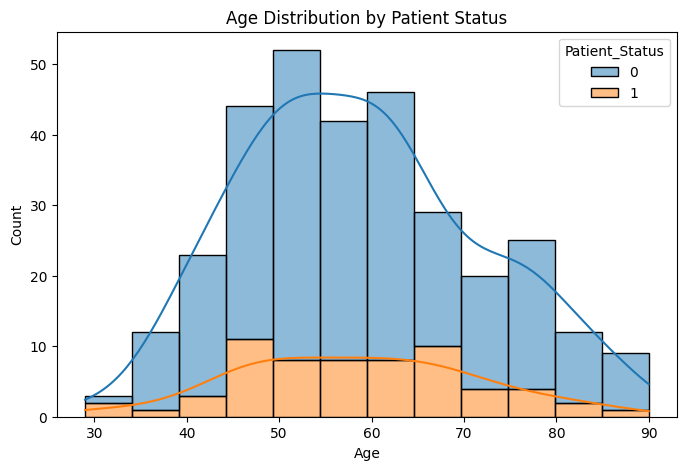

In [128]:
if 'Age' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x='Age', hue='Patient_Status', multiple='stack', kde=True)
    plt.title("Age Distribution by Patient Status")
    plt.show()


In [129]:
# Plotly interactive bar chart (optional)
fig = px.histogram(df, x="Age", color="Patient_Status", title="Interactive Age Distribution")
fig.show()

In [130]:
# ML Modeling
X = df.drop("Patient_Status", axis=1)
y = df["Patient_Status"]

In [136]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [137]:
y_pred = model.predict(X_test)

In [142]:

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[72  0]
 [24  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        72
           1       0.00      0.00      0.00        24

    accuracy                           0.75        96
   macro avg       0.38      0.50      0.43        96
weighted avg       0.56      0.75      0.64        96

Accuracy: 0.75
